In [1]:
from layers import *
from synaptics import *
import numpy as np
import matplotlib.pyplot as plt
resolution = .1

In [17]:
inp_size = 1000
outp_size = 100
layer = IandFLayer(size=inp_size, resolution = resolution, tau=30)
layer1 = IandFLayer(size=outp_size, resolution = resolution, tau=30)
synapse = Synapse(layer, layer1)

In [62]:
inp_size = 1000
outp_size = 100
layer = IzhikevichLayer(size=inp_size, preset='RS', resolution=resolution)
layer1 = IzhikevichLayer(size=outp_size, preset='RS', resolution = resolution)
synapse = Synapse(layer, layer1)

In [70]:
v0 = []
v1 = []
v2 = []
v3 = []
w00 = []
w10 = []
w01 = []
w11 = []
t = []
a = np.ones(outp_size) * 3
layer.transmitter_impact = 8
layer.apply_current(np.arange(inp_size)*.01)
for i in range(int(1000//resolution)):
    synapse.forward()
    #layer1.apply_current(a)
    layer1.forward()
    synapse.STDP(.001, 1.)
    v0.append(layer.v[-1])
    v1.append(layer.v[-2])
    v2.append(layer1.v[0])
    v3.append(layer1.v[1])
    w00.append(synapse.weights[0,0])
    w10.append(synapse.weights[1,0])
    w01.append(synapse.weights[0,1])
    w11.append(synapse.weights[1,1])
    t.append(i*resolution)

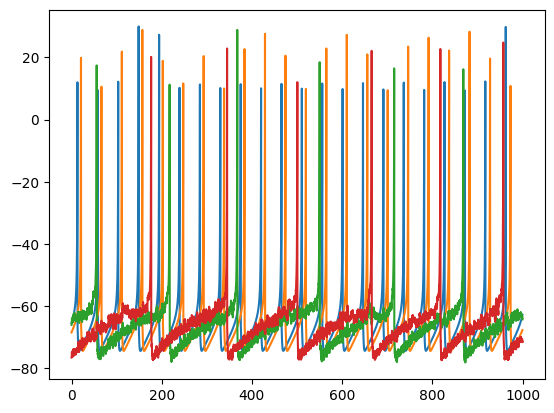

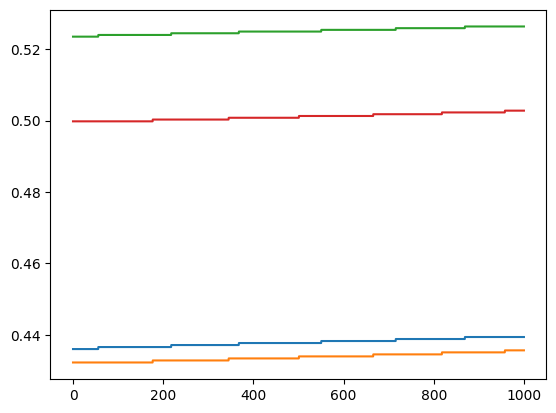

In [71]:
plt.plot(t,v0)
plt.plot(t,v1)
plt.plot(t,v2)
plt.plot(t,v3)
plt.show()
plt.plot(t,w00) #works
plt.plot(t,w10) #works
plt.plot(t,w01) #works
plt.plot(t,w11) #works
plt.show()

In [3]:
layer = IzhikevichLayer(size=10000, preset='CH', resolution=1)
layer1 = IzhikevichLayer(size=10000, preset='CH', resolution = 1)
synapse = Synapse(layer, layer1, tau=.2)
layer.apply_current(np.ones(10000)*5)
def check_speed(layer, layer1, synapse):
    synapse.forward()
    synapse.STDP(.1, 1)
%timeit check_speed(layer, layer1, synapse)

47.1 ms ± 402 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
layer = IzhikevichLayer(size=1, preset='CH', inhibitory=False, ap_threshold=30, resolution = .1)
layer.I = 20
v = []
for i in range(2000):
    #b = layer[0]
    #print(b)
    layer.dynamics()
    v.append(layer.v[-1].item())
plt.plot(v)
plt.show()
print(type(layer.v[0]))

In [ ]:
print(layer.propagate())

In [ ]:
v = -65.
arv = np.array([-65.])

In [ ]:
print(type(arv.item()))

In [ ]:
v += 0.04*v**2 + 5*v + 140 - 0.2*v + 4
arv += 0.04*arv**2 + 5*arv + 140 - 0.2*arv + 4


In [44]:
def python(v, u, a, b, c, d, I):
    #v = -65
    #u = 0.2 * v
    for i in range(len(v)):
        v[i] += 0.04*v[i]**2 + 5*v[i] + 140 - u[i] + I
        u[i] += a * (b * v[i] - u[i])
        if v[i] > 30:
            v[i] = c
            u[i] += d
    return v, u

def npars(v, u, a, b, c, d, I):
    v += 0.04*v**2 + 5*v + 140 - u + I
    u += a * (b * v - u)
    spiked = v > 30
    didnt_spike = v <= 30
    v_recovered = spiked * c
    u_recovered = spiked * (u + d)
    v_working = didnt_spike * v
    u_working = didnt_spike * u
    v = v_recovered + v_working
    #print(v_recovered, v_working, v)
    u = u_recovered + u_working
    return v, u

def npwithloop(v, u, a, b, c, d, I):
    v += 0.04*v**2 + 5*v + 140 - u + I
    u += a * (b * v - u)
    for i in range(len(v)):
        if v[i] > 30:
            v[i] = c
            u[i] += d
    return v, u

In [45]:
v_simple = [-65]
u_simple = [0.2 * v_simple[0]]
v_arr = np.array([-65.]).astype(np.float64)
u_arr = v_arr * .2
v_loop = np.copy(v_arr)
u_loop = np.copy(u_arr)

x0 = []
x1 = []
x2 = []
for i in range(200):
    v_simple, u_simple = python(v_simple, u_simple, 0.02, 0.2, -50, 2, I=7)
    v_arr, u_arr = npars(v_arr, u_arr, 0.02, 0.2, -50, 2, I=7)
    v_loop, u_loop = npwithloop(v_loop, u_loop, 0.02, 0.2, -50, 2, I=7)
    #print(v_simple, v_arr, v_loop)
    x0.append(v_simple[0])
    x1.append(v_arr[0])
    x2.append(v_loop[0])

x0 = np.array(x0)
x1 = np.array(x1)
x2 = np.array(x2)

In [46]:
v_arr = np.ones(10000) * (-65)
u_arr = v_arr * .2
v = v_arr.tolist()
u = u_arr.tolist()
%timeit python(v, u, 0.02, 0.2, -50, 2, I=7)
%timeit npars(v_arr, u_arr, 0.02, 0.2, -50, 2, I=7)
%timeit npwithloop(v_arr, u_arr, 0.02, 0.2, -50, 2, I=7)

3.74 ms ± 50.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


C:\Users\iamkg0\AppData\Local\Temp\ipykernel_4192\1680122238.py:13: RuntimeWarning: overflow encountered in square
  v += 0.04*v**2 + 5*v + 140 - u + I
C:\Users\iamkg0\AppData\Local\Temp\ipykernel_4192\1680122238.py:19: RuntimeWarning: invalid value encountered in multiply
  v_working = didnt_spike * v
C:\Users\iamkg0\AppData\Local\Temp\ipykernel_4192\1680122238.py:20: RuntimeWarning: invalid value encountered in multiply
  u_working = didnt_spike * u
C:\Users\iamkg0\AppData\Local\Temp\ipykernel_4192\1680122238.py:13: RuntimeWarning: invalid value encountered in subtract
  v += 0.04*v**2 + 5*v + 140 - u + I


92.6 µs ± 300 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
843 µs ± 3.53 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
plt.plot(x0)
plt.plot(x1)
plt.plot(x2)
plt.show()

In [ ]:
def compare(arr):
    return arr >= 30
def absolute(arr):
    return np.abs(arr-1)
arr = np.arange(10000)
%timeit compare(arr)
%timeit absolute(arr)

In [ ]:
parent = test_parent(hueta=123)
herit = test_herit(321)
print(herit.check())

In [ ]:
a = np.arange(3)
b = np.tile(a, 3).reshape(3,3)
print(a,b)
c = np.dot(a,b)
print(c)
